In [4]:
# experiment 1
import torch
import numpy as np

import model
import copy
import torch.nn as nn
import torch.optim as optim

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


In [82]:
# our method

import numpy as np
import torch
mode = 0
sigma = 0.5
n = 2000
m = 1000
para_value = np.ndarray((200,2))
nonpara_value = np.ndarray((200))
size_0 = 0
size_1 = 0
size_2 = 0
size_0_val = 0
size_1_val = 0
size_2_val = 0
for seed in range(200):
    validation_loss_before = np.inf
    for lamda in [1]:
        _checkpoint = torch.load("./checkpoint/partial_linear_main_%d_%.3f_%.3f_%d_%d_%d.pth"%(n,lamda,sigma,m,mode,seed))
        if _checkpoint['validation_loss'] < validation_loss_before:
            checkpoint = _checkpoint
            validation_loss_before = checkpoint['validation_loss']
            _lamda = lamda
    # print(_lamda)
    para_value[seed,:] = torch.Tensor.cpu(checkpoint['beta'].data).numpy().reshape(-1)
    nonpara_value[seed] = checkpoint['test_f_loss']
    size_0 += checkpoint['size_0']
    size_1 += checkpoint['size_1']
    size_2 += checkpoint['size_2']
    size_0_val += checkpoint['size_0_val']
    size_1_val += checkpoint['size_1_val']
    size_2_val += checkpoint['size_2_val']
bar_beta_ = np.mean(para_value,axis=0)
bias = bar_beta_ - [1,0.75]
print('bias:%.6f'%(np.sqrt(np.sum(np.square(bias)))))
std_beta = np.sum(np.mean(np.square(para_value - bar_beta_),axis=0))**0.5
print('std:%.6f'%(std_beta))
print('mse:%.6f'%(np.sqrt(np.sum(np.square(bias)))**2 + std_beta**2))
mse_f = np.mean(nonpara_value,axis = 0)
print('mse:%.6f'%(mse_f))
print(size_0/200)
print(size_1/200)
print(size_2/200)
print(size_0_val/200)
print(size_1_val/200)
print(size_2_val/200)

/tmp/ipykernel_119834/3512017781.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _checkpoint = torch.load("./checkpoint/partial_linear_main_%d_%.3f_%.3f_%d_%d_%d.pth"%(

bias:0.020999
std:0.076106
mse:0.006233
mse:0.061791
0.07
0.085
0.05
0.06
0.075
0.05


In [ ]:
# our method

import numpy as np
import torch
mode = 9
sigma = 0.5
n = 500
m = 1000
# para_value = np.ndarray((200,2))
# nonpara_value = np.ndarray((200))
size_0 = 0
size_1 = 0
size_2 = 0
size_0_val = 0
size_1_val = 0
size_2_val = 0
for seed in range(500):
    validation_loss_before = np.inf
    for lamda in [1]:
        _checkpoint = torch.load("./checkpoint/partial_linear_main_%d_%.3f_%.3f_%d_%d_%d.pth"%(n,lamda,sigma,m,mode,seed))
        if _checkpoint['validation_loss'] < validation_loss_before:
            checkpoint = _checkpoint
            validation_loss_before = checkpoint['validation_loss']
            _lamda = lamda
    # print(_lamda)
    # para_value[seed,:] = torch.Tensor.cpu(checkpoint['beta'].data).numpy().reshape(-1)
    # nonpara_value[seed] = checkpoint['test_f_loss']
    size_0 += checkpoint['size_0']
    size_1 += checkpoint['size_1']
    size_2 += checkpoint['size_2']
    size_0_val += checkpoint['size_0_val']
    size_1_val += checkpoint['size_1_val']
    size_2_val += checkpoint['size_2_val']
# bar_beta_ = np.mean(para_value,axis=0)
# bias = bar_beta_ - [1,0.75]
# print('bias:%.6f'%(np.sqrt(np.sum(np.square(bias)))))
# std_beta = np.sum(np.mean(np.square(para_value - bar_beta_),axis=0))**0.5
# print('std:%.6f'%(std_beta))
# print('mse:%.6f'%(np.sqrt(np.sum(np.square(bias)))**2 + std_beta**2))
# mse_f = np.mean(nonpara_value,axis = 0)
# print('mse:%.6f'%(mse_f))
if mode == 0 or mode == 1 or n == 2000:
    print(1-size_0/500)
    print(1-size_1/500)
else:
    print(1-size_0_val/500)
    print(1-size_1_val/500)

/tmp/ipykernel_78671/126199815.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _checkpoint = torch.load("./checkpoint/partial_linear_main_%d_%.3f_%.3f_%d_%d_%d.pth"%(n,

0.902
0.906
0.874
0.986
0.988
0.988


In [41]:
# baseline
# under para

import numpy as np
import torch
mode = 9
sigma = 0.5
n = 2000
m = 8
para_value = np.ndarray((200,2))
nonpara_value = np.ndarray((200))
for seed in range(200):
    checkpoint = torch.load("./checkpoint/partial_linear_nn_%d_%.3f_%d_%d_%d.pth"%(n,sigma,m,mode,seed))
    para_value[seed,:] = torch.Tensor.cpu(checkpoint['beta'].data).numpy().reshape(-1)
    nonpara_value[seed] = checkpoint['test_f_loss']
bar_beta_ = np.mean(para_value,axis=0)
bias = bar_beta_ - [1,0.75]
print('bias:%.6f'%(np.sqrt(np.sum(np.square(bias)))))
std_beta = np.sum(np.mean(np.square(para_value - bar_beta_),axis=0))**0.5
print('std:%.6f'%(std_beta))
print('mse:%.6f'%(np.sqrt(np.sum(np.square(bias)))**2 + std_beta**2))
mse_f = np.mean(nonpara_value,axis = 0)
print('mse:%.6f'%(mse_f))

/tmp/ipykernel_119834/3595403073.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("./checkpoint/partial_linear_nn_%d_%.3f_%d_%d_%d.pth"%(n,sigma,

bias:1.106829
std:0.131571
mse:1.242382
mse:5.115377


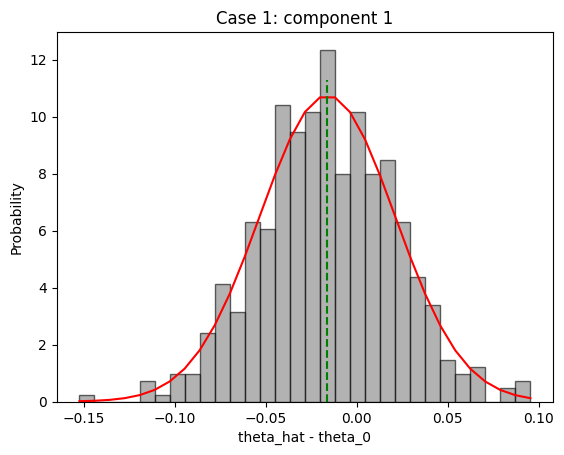

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# plt.rcParams['font.family']='Arial' 
# plt.rcParams['font.size']=15
# plt.figure(figsize=(10,7))
data = (para_value[:,0]-1).reshape(-1)
# data = np.random.randn(10000)
mu =np.mean(data) 
sigma =np.std(data) 
num_bins = 30
n, bins, patches = plt.hist(data, num_bins,density=True, edgecolor="black",facecolor='gray',
                            alpha=0.6)
y = norm.pdf(bins, mu, sigma) 
plt.plot(bins, y, 'r-') 
plt.axvline(x=mu,ls="--",c="green",ymin =0,ymax=0.87)
plt.xlabel('theta_hat - theta_0') 
plt.ylabel('Probability') 
plt.title('Case 1: component 1')
plt.show()

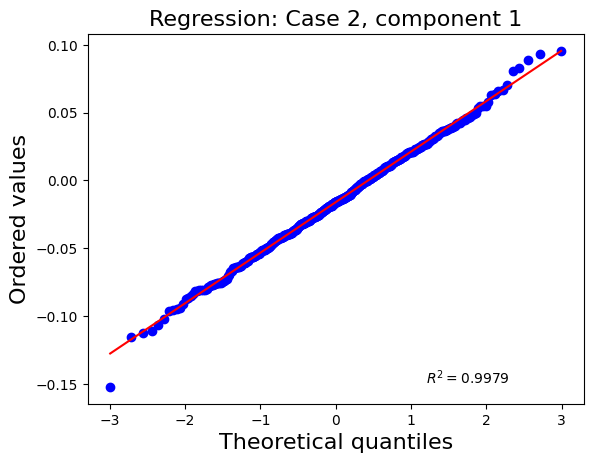

In [107]:
import matplotlib.pyplot as plt
from scipy import stats
para_mat = para_value[:,0] - 1
stats.probplot(para_mat.reshape(-1),dist=stats.norm, plot=plt,rvalue=True)   
plt.title('Regression: Case 2, component 1',fontsize=16)
plt.xlabel('Theoretical quantiles',fontsize=16)
plt.ylabel('Ordered values',fontsize=16)
plt.show()
# plt.savefig('pic/regression_qqplot_%d_%.3f_%d_%d.png'%(n,sigma,m,mode))

In [91]:
# baseline 1
# spline

import numpy as np

mode = 8
sigma = 0.5
n= 500
para_value = np.ndarray((200,2))
nonpara_value = np.ndarray((200))
for seed in range(200):
    checkpoint = np.load("./output/partial_linear_spline_%d_%.3f_%d_%d.npz"%(n,sigma,mode,seed))
    para_value[seed,:] = checkpoint['beta']
    nonpara_value[seed] = checkpoint['non_loss']
bar_beta_ = np.mean(para_value,axis=0)
bias = bar_beta_ - [1,0.75]
print('bias:%.6f'%(np.sqrt(np.sum(np.square(bias)))))
std_beta = np.sum(np.mean(np.square(para_value - bar_beta_),axis=0))**0.5
print('std:%.6f'%(std_beta))
print('mse:%.6f'%(np.sqrt(np.sum(np.square(bias)))**2 + std_beta**2))
mse_f = np.mean(nonpara_value,axis = 0)
print('mse:%.6f'%(mse_f))

bias:0.003146
std:0.134177
mse:0.018013
mse:0.710527


In [65]:
# baseline 2
# kernel

import numpy as np

mode = 9
sigma = 0.5
n= 2000
para_value = np.ndarray((200,2))
nonpara_value = np.ndarray((200))
for seed in range(200):
    checkpoint = np.load("./output/partial_linear_rkhs_%d_%.3f_%d_%d.npz"%(n,sigma,mode,seed))
    para_value[seed,:] = checkpoint['beta']
    nonpara_value[seed] = checkpoint['non_loss']
bar_beta_ = np.mean(para_value,axis=0)
bias = bar_beta_ - [1,0.75]
print('bias:%.6f'%(np.sqrt(np.sum(np.square(bias)))))
std_beta = np.sum(np.mean(np.square(para_value - bar_beta_),axis=0))**0.5
print('std:%.6f'%(std_beta))
print('mse:%.6f'%(np.sqrt(np.sum(np.square(bias)))**2 + std_beta**2))
mse_f = np.mean(nonpara_value,axis = 0)
print('mse:%.6f'%(mse_f))

bias:0.002919
std:0.091405
mse:0.008363
mse:0.304706


In [81]:
# baseline 3
# local linear

import numpy as np

mode = 9
sigma = 0.5
n= 2000
para_value = np.ndarray((200,2))
nonpara_value = np.ndarray((200))
for seed in range(200):
    checkpoint = np.load("./output/partial_linear_locallinear_%d_%.3f_%d_%d.npz"%(n,sigma,mode,seed))
    para_value[seed,:] = checkpoint['beta']
    nonpara_value[seed] = checkpoint['non_loss']
bar_beta_ = np.mean(para_value,axis=0)
bias = bar_beta_ - [1,0.75]
print('bias:%.6f'%(np.sqrt(np.sum(np.square(bias)))))
std_beta = np.sum(np.mean(np.square(para_value - bar_beta_),axis=0))**0.5
print('std:%.6f'%(std_beta))
print('mse:%.6f'%(np.sqrt(np.sum(np.square(bias)))**2 + std_beta**2))
mse_f = np.mean(nonpara_value,axis = 0)
print('mse:%.6f'%(mse_f))

bias:1.920750
std:2.794451
mse:11.498235
mse:9.399388
